In [23]:
import pandas as pd
customers = pd.read_csv(r"C:\Users\Lenovo\Dropbox\PC\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\Lenovo\Dropbox\PC\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\Lenovo\Dropbox\PC\Downloads\Transactions.csv")

print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [17]:
print("Missing values in Customers:")
print(customers.isnull().sum())

print("Missing values in Products:")
print(products.isnull().sum())

print("Missing values in Transactions:")
print(transactions.isnull().sum())



Missing values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [18]:
print("Duplicate rows in Customers:", customers.duplicated().sum())
print("Duplicate rows in Products:", products.duplicated().sum())
print("Duplicate rows in Transactions:", transactions.duplicated().sum())

customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

Duplicate rows in Customers: 0
Duplicate rows in Products: 0
Duplicate rows in Transactions: 0


In [25]:

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [22]:
customers = customers[['CustomerID', 'Region', 'SignupDate']]
products = products[['ProductID', 'Category', 'Price']]
transactions = transactions[['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate', 'Quantity', 'TotalValue']]
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
print(merged_data.head())


  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue         Region SignupDate     Category   Price  
0      300.68         Europe 2022-12-03  Electronics  300.68  
1      300.68           Asia 2024-09-04  Electronics  300.68  
2      300.68         Europe 2024-04-04  Electronics  300.68  
3      601.36  South America 2024-04-11  Electronics  300.68  
4      902.04         Europe 2022-03-15  Electronics  300.68  


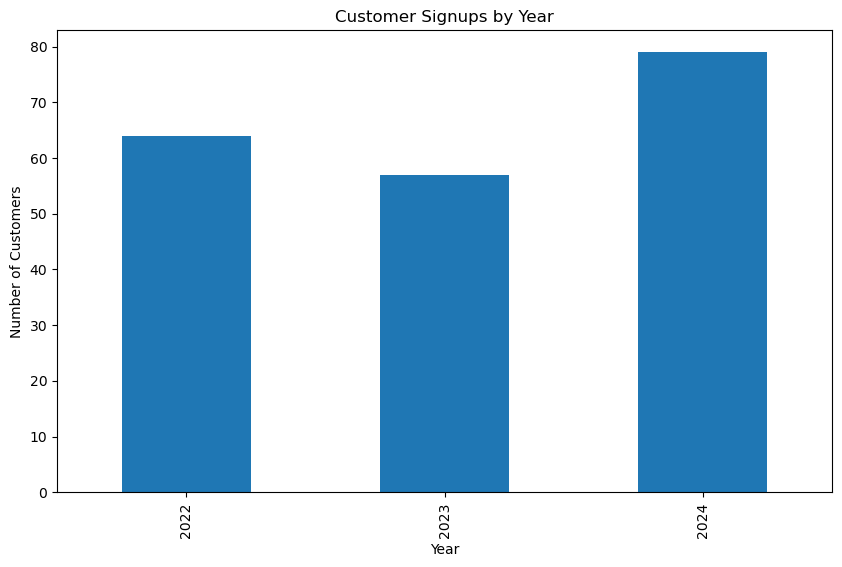

In [26]:
import matplotlib.pyplot as plt

customers['SignupYear'] = customers['SignupDate'].dt.year

signup_year_trends = customers['SignupYear'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
signup_year_trends.plot(kind='bar', title='Customer Signups by Year')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.show()


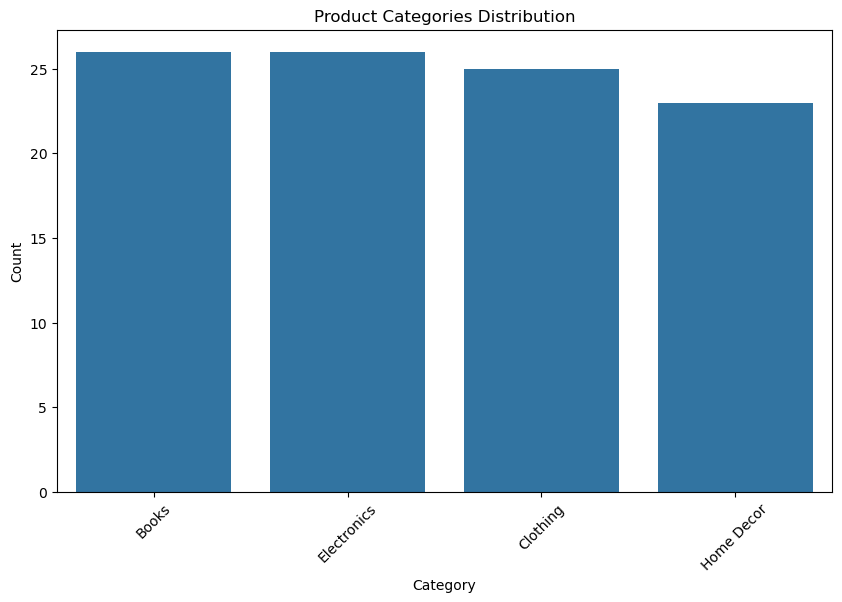

In [32]:
import seaborn as sns
category_counts = products['Category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Product Categories Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15056\3460477548.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_sold_products.values, y=most_sold_products.index, palette="viridis")


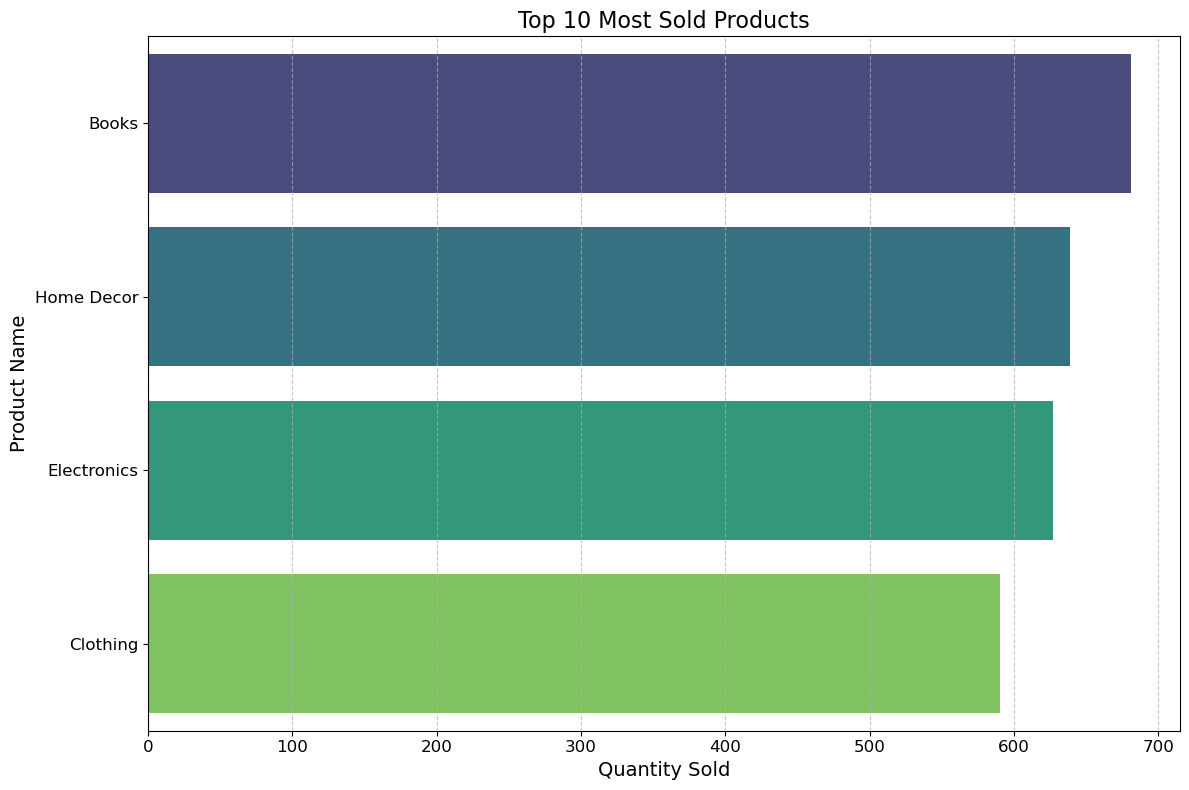

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

most_sold_products = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False).head(10)
print(most_sold_products)

plt.figure(figsize=(12, 8))
sns.barplot(x=most_sold_products.values, y=most_sold_products.index, palette="viridis")
plt.title('Top 10 Most Sold Products', fontsize=16)
plt.xlabel('Quantity Sold', fontsize=14)
plt.ylabel('Product Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
